In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
import itertools
import re
import os
import pickle
from datetime import datetime

In [129]:
df_page0 = pd.read_csv('test_page.csv', dtype='object')
df0 = pd.read_csv('test_event.csv', dtype='object')

In [130]:
a = pd.read_csv('page26_28.csv', dtype='object' )
b = pd.read_csv('event26_28.csv', dtype='object')

In [131]:
df_page1 = df_page0.loc[(df_page0['date'] == '20201022') | (df_page0['date'] == '20201023') | (df_page0['date'] == '20201024') |(df_page0['date'] == '20201025')]
df1 = df0.loc[(df0['date'] == '20201022') | (df0['date'] == '20201023') | (df0['date'] == '20201024') | (df0['date'] == '20201025')]

In [132]:
df_page = df_page1.copy()
df = df1.copy()

In [133]:
df_page = df_page.append(a)
df = df.append(b)

In [135]:
df_page['day_visit'] = df_page.groupby('fullVisitorId')['date'].transform('nunique')
df_page['session_visit'] = df_page.groupby('fullVisitorId')['visitId'].transform('nunique')

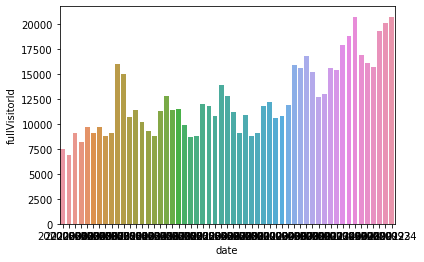

In [25]:
tmp = df_page.groupby('date').fullVisitorId.nunique().reset_index(inplace=False)
sns.barplot(x=tmp.date, y=tmp.fullVisitorId, data=tmp)

In [136]:
import calendar 
df_page['day'] = df_page['date'].apply(lambda x: calendar.day_name[datetime.strptime(x, '%Y%m%d').weekday()])


<AxesSubplot:xlabel='day', ylabel='fullVisitorId'>

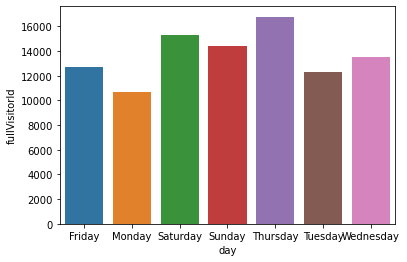

In [137]:
tmp = df_page.groupby('day').fullVisitorId.nunique().reset_index(inplace=False)
sns.barplot(x=tmp.day, y=tmp.fullVisitorId, data=tmp)

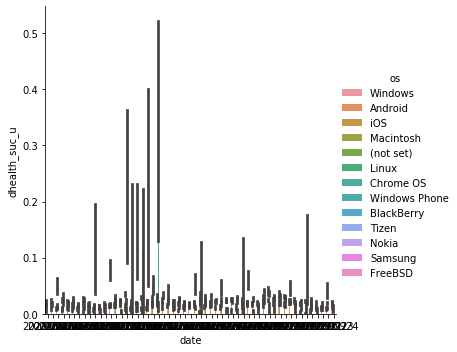

In [116]:
sns.catplot(data=df_page, kind="bar", x="date", y="dhealth_suc_u", hue="os")

In [138]:
df_page['page_per_session'] = df_page.groupby('visitId')['visitId'].transform('count')
df_page['page_per_user'] = df_page.groupby('fullVisitorId')['visitId'].transform('count')

In [139]:
df_page['os_new'] = np.where(df_page['os'].str.contains('Windows'), 'Windows',
                              np.where(df_page['os'].str.contains('Android'), 'Android',
                              np.where(df_page['os'].str.contains('iOS'), 'iOS', 'other' )))

In [140]:
df_page['product_health'] = np.where(df_page['pagePath'].str.contains('d-health'), 'd-health',
                              np.where(df_page['pagePath'].str.contains('elite-health'), 'elite-health',
                              np.where(df_page['pagePath'].str.contains('maochai-extra'), 'maochai-extra',
                              np.where(df_page['pagePath'].str.contains('extra-care-plus'), 'extra-care-plus',         
                              np.where(df_page['pagePath'].str.contains('opd'), 'opd',         
                                       'other')))))

In [141]:
df_page['dhealth_thankyou'] = np.where(df_page['pagePath'].str.contains('d-health')&(df_page['pagePath'].str.contains('thank-you')), 1,0)
df_page['elite_thankyou'] = np.where(df_page['pagePath'].str.contains('elite-health')&(df_page['pagePath'].str.contains('thank-you')), 1,0)
df_page['maochai_thankyou'] = np.where(df_page['pagePath'].str.contains('maochai-extra')&(df_page['pagePath'].str.contains('thank-you')), 1,0)
df_page['extracare_thankyou'] = np.where(df_page['pagePath'].str.contains('extra-care-plus')&(df_page['pagePath'].str.contains('thank-you')), 1,0)
df_page['opd_thankyou'] = np.where(df_page['pagePath'].str.contains('opd')&(df_page['pagePath'].str.contains('thank-you')), 1,0)
df_page['thankyou'] = np.where(df_page['pagePath'].str.contains('thank-you'), 1,0)

In [142]:
df_page['health_thankyou'] = df_page['dhealth_thankyou'] + df_page['elite_thankyou'] + df_page['maochai_thankyou'] + df_page['extracare_thankyou'] + df_page['opd_thankyou']

In [143]:
df_page['health_yesno'] = np.where(df_page['pagePath'].str.contains('health-insurance'), 1,0)

In [144]:
df_page['pathlastlv'] = np.where(df_page['pathlv4'].notnull(), df_page['pathlv4'],
                                 np.where(df_page['pathlv3'].notnull(), df_page['pathlv3'], 
                                 np.where(df_page['pathlv2'].notnull(), df_page['pathlv2'], df_page['pathlv1'])))

In [145]:

df_page['pathlastlv'] = df_page['pathlastlv'].replace({'/th':'home','/th-th':'home', '/en':'home','/en-en':'home'})

In [146]:
df_page.fillna('', inplace=True)
df_page['pathlastlv'] = df_page['pathlastlv'].apply(lambda x: x.split('?')[0])

In [147]:
df_page['pathlastlv2'] = np.where(df_page['pathlastlv'].str.contains('d-health'), 'd-health',
                                  np.where(df_page['pathlastlv'].str.contains('elite-health'), 'elite-health',
                                  np.where(df_page['pathlastlv'].str.contains('maochai'), 'maochai',
                                  np.where(df_page['pathlastlv'].str.contains('extra-care'), 'extra-care',
                                  np.where(df_page['pathlastlv'].str.contains('opd'), 'opd',
                                  np.where(df_page['pathlastlv'].str.contains('home'), 'home',  
                                  np.where(df_page['pathlastlv'].str.contains('health-insurance'), 'health-insurance',  
                                  np.where(df_page['pathlastlv'].str.contains('return-retire'), 'return-retire',
                                  np.where(df_page['pathlastlv'].str.contains('mtlclick '), 'mtlclick ',
                                  np.where(df_page['pathlastlv'].str.contains('waigao'), 'waigao',
                                  np.where(df_page['pathlastlv'].str.contains('ci-perfect-care '), 'ci-perfect-care ',
                                  np.where(df_page['pathlastlv'].str.contains('contact'), 'contact',
                                  np.where(df_page['pathlastlv'].str.contains('life-insurance'), 'life-insurance',
                                  np.where(df_page['pathlastlv'].str.contains('savings-insurance'), 'savings-insurance',
                                  np.where(df_page['pathlastlv'].str.contains('match-your-need'), 'match-your-need',
                                  np.where(df_page['pathlastlv'].str.contains('smileclub'), 'smileclub',
                                  np.where(df_page['pathlastlv'].str.contains('retirement-insurance'), 'retirement-insurance',
                                  np.where(df_page['pathlastlv'].str.contains('whole-life-insurance'), 'whole-life-insurance', 'other'))))))))))))))))))         
                                           
                                           
                                           

In [148]:
df_page['prodgroup'] = np.where(df_page['pathlv2'] != '', df_page['pathlv2'], df_page['pathlv1'])
df_page['prodgroup'] = df_page['prodgroup'].replace({'/th':'home','/th-th':'home', '/en':'home','/en-en':'home'})

In [149]:
df_page['prodgroup2'] = np.where(df_page['prodgroup'].str.contains('health-insurance'), 'health-insurance',
                                  np.where(df_page['prodgroup'].str.contains('savings-insurance'), 'savings-insurance',
                                  np.where(df_page['prodgroup'].str.contains('whole-life-insurance'), 'whole-life-insurance',
                                  np.where(df_page['prodgroup'].str.contains('critical-illness-insurance'), 'critical-illness-insurance',
                                  np.where(df_page['prodgroup'].str.contains('retirement-insurance'), 'retirement-insurance',
                                  np.where(df_page['prodgroup'].str.contains('life-insurance'), 'life-insurance',  
                                  np.where(df_page['prodgroup'].str.contains('personal-accident-insurance'), 'personal-accident-insurance',  
                                  np.where(df_page['prodgroup'].str.contains('group-insurance'), 'group-insurance', 'other'))))))))         
                                           
                                           
                                           

In [150]:
df_page = df_page.loc[(df_page['page_per_session'] <= 16)].copy()

In [151]:
dhealth_suc = df_page.loc[(df_page['dhealth_thankyou'] == 1)].drop_duplicates(['fullVisitorId'])
elite_suc = df_page.loc[(df_page['elite_thankyou'] == 1)].drop_duplicates(['fullVisitorId'])
maochai_suc = df_page.loc[(df_page['maochai_thankyou'] == 1)].drop_duplicates(['fullVisitorId'])
extracare_suc = df_page.loc[(df_page['extracare_thankyou'] == 1)].drop_duplicates(['fullVisitorId'])
opd_suc = df_page.loc[(df_page['opd_thankyou'] == 1)].drop_duplicates(['fullVisitorId'])

health_suc = df_page.loc[(df_page['health_thankyou'] != 0)].drop_duplicates(['fullVisitorId'])

In [152]:
thankyou = df_page.loc[(df_page['thankyou'] != 0)].drop_duplicates(['fullVisitorId'])

In [153]:
df_page['dhealth_suc_u'] = df_page.fullVisitorId.isin(dhealth_suc.fullVisitorId).astype(int)
df_page['health_suc_u'] = df_page.fullVisitorId.isin(health_suc.fullVisitorId).astype(int)



In [154]:
df_page['thxu'] = df_page.fullVisitorId.isin(thankyou.fullVisitorId).astype(int)

In [155]:
df_page['dhealth_suc_s2'] = df_page.visitId.isin(dhealth_suc.visitId).astype(int)
df_page['health_suc_s2'] = df_page.visitId.isin(health_suc.visitId).astype(int)

In [156]:
df_page['prodview'] = df_page.groupby('fullVisitorId')['prodgroup2'].transform('nunique')
prod = df_page.loc[(df_page['prodgroup2'] != 'other')].copy()

In [157]:
prod['prodview'] = prod.groupby('fullVisitorId')['prodgroup2'].transform('nunique')

In [158]:
prod2 = prod[['thxu','health_suc_u','product_health','fullVisitorId', 'visitId', 'date','dhealth_suc_u','day_visit','session_visit','page_per_session','pathlastlv2','prodgroup2','prodview']].copy()

In [159]:
temp = prod2.loc[(prod2['prodview'] != 1)].copy()
temp2 = temp.loc[(temp['prodgroup2'] == 'health-insurance')].drop_duplicates(subset = ['fullVisitorId'])

In [160]:
temp['health'] = temp.fullVisitorId.isin(temp2.fullVisitorId).astype(int)

In [161]:
temp3 = prod2.loc[(prod2['product_health'] != 'other')].copy()

In [162]:
temp3['healthview'] = temp3.groupby('fullVisitorId')['product_health'].transform('nunique')

In [32]:
page_no_thx = df_page.loc[(df_page['thankyou'] != 1)]
unique = page_no_thx.sort_values('hitNumber', ascending=False).drop_duplicates()
path_suc = (unique.set_index(['fullVisitorId', unique.groupby('fullVisitorId').cumcount()])['pathlastlv2']
         .unstack(fill_value='')
         .add_prefix('path_')
         .reset_index())

In [35]:
path_suc

,fullVisitorId,path_0,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8,...,path_414,path_415,path_416,path_417,path_418,path_419,path_420,path_421,path_422,path_423
0,1000005517811636188,health-insurance,,,,,,,,,...,,,,,,,,,,
1,1000010598769456872,other,,,,,,,,,...,,,,,,,,,,
2,100005214121624974,d-health,,,,,,,,,...,,,,,,,,,,
3,1000073352538941855,d-health,,,,,,,,,...,,,,,,,,,,
4,1000112767449694370,other,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542208,999930798275966572,d-health,other,,,,,,,,...,,,,,,,,,,
542209,999937807665472356,d-health,,,,,,,,,...,,,,,,,,,,
542210,999940303041469869,d-health,,,,,,,,,...,,,,,,,,,,
542211,999987513319379665,other,other,,,,,,,,...,,,,,,,,,,


In [36]:
unique2 = page_no_thx.sort_values('hitNumber', ascending=True).drop_duplicates()
path_succ = (unique2.set_index(['fullVisitorId', unique2.groupby('fullVisitorId').cumcount()])['pathlastlv2']
         .unstack(fill_value='')
         .add_prefix('path_')
         .reset_index())

In [37]:
path_suc['last2'] = np.where(path_suc['path_1']!= '', path_suc['path_0']+ ' > '+ path_suc['path_1'], path_suc['path_0'])
path_suc['last3'] = np.where(path_suc['path_2']!= '',path_suc['path_0']+ ' > '+ path_suc['path_1']+ ' >> '+ path_suc['path_2'] , path_suc['last2'])
path_suc['last4'] = np.where(path_suc['path_3']!= '',path_suc['path_0']+ ' > '+ path_suc['path_1']+ ' >> '+ path_suc['path_2'] + ' >>> '+ path_suc['path_3'], path_suc['last3'])

In [38]:
path_succ['last2'] = np.where(path_succ['path_1']!= '',path_succ['path_0']+ ' > '+ path_succ['path_1'], path_succ['path_0'])
path_succ['last3'] = np.where(path_succ['path_2']!= '',path_succ['path_0']+ ' > '+ path_succ['path_1']+ ' >> '+ path_succ['path_2'] , path_succ['last2'])
path_succ['last4'] = np.where(path_succ['path_3']!= '',path_succ['path_0']+ ' > '+ path_succ['path_1']+ ' >> '+ path_succ['path_2'] + ' >>> '+ path_succ['path_3'], path_succ['last3'])

In [39]:
tmp = path_suc[['fullVisitorId','path_0','last2','last3','last4']].copy()
tmp['dhealth_suc_u'] = tmp.fullVisitorId.isin(dhealth_suc.fullVisitorId).astype(int)

tmpc = path_succ[['fullVisitorId','path_0','last2','last3','last4']].copy()
tmpc['dhealth_suc_u'] = tmpc.fullVisitorId.isin(dhealth_suc.fullVisitorId).astype(int)





In [41]:
tmp.loc[(tmp['last3'].str.contains('>>')) & (tmp['dhealth_suc_u'] == 0)].groupby('last3')['last3'].count().to_csv('result3.csv')

In [42]:
tmpc.loc[(tmpc['last3'].str.contains('>>')) & (tmpc['dhealth_suc_u'] == 1)].groupby('last3')['last3'].count().to_csv('result33.csv')

In [43]:
tmp.loc[(tmp['last4'].str.contains('>>>')) & (tmp['dhealth_suc_u'] == 0)].groupby('last4')['last4'].count()
tmpc.loc[(tmpc['last4'].str.contains('>>>')) & (tmpc['dhealth_suc_u'] == 1)].groupby('last4')['last4'].count().nlargest(10)

last4
d-health > d-health >> d-health >>> d-health    179
d-health > d-health >> d-health >>> home        159
d-health > d-health >> home >>> d-health         81
d-health > d-health >> home >>> home             41
d-health > d-health >> d-health >>> other        39
d-health > home >> d-health >>> home             38
d-health > home >> d-health >>> d-health         34
d-health > home >> home >>> d-health             34
d-health > d-health >> home >>> other            31
d-health > other >> home >>> d-health            30
Name: last4, dtype: int64

In [44]:
tmpc.loc[(tmpc['last4'] == 'd-health > d-health >> d-health >>> home')]

,fullVisitorId,path_0,last2,last3,last4,dhealth_suc_u
18,1000228237645869877,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,0
28,100048202446731582,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,0
137,1002149024329930551,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,0
1941,1030537869099014471,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,0
2287,1035554433850400384,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,0
...,...,...,...,...,...,...
539528,959423333918051056,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,0
539683,961582560005871057,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,0
540640,976172181658807019,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,0
541599,991250175441292750,d-health,d-health > d-health,d-health > d-health >> d-health,d-health > d-health >> d-health >>> home,1


In [164]:
df['cat_label'] = df['category'] + ' & ' + df['label']

In [165]:
df['event_per_session'] = df.groupby('visitId')['cat_label'].transform('nunique')
df['event_per_user'] = df.groupby('fullVisitorId')['cat_label'].transform('nunique')

In [166]:
df['dhealth_suc_u'] = df.fullVisitorId.isin(dhealth_suc.fullVisitorId).astype(int)

<AxesSubplot:>

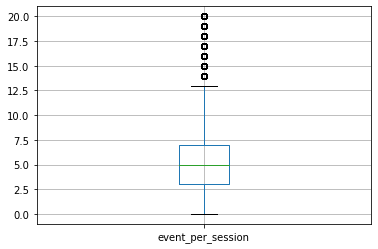

In [167]:
ev.boxplot(column='event_per_session', return_type='axes')

In [168]:
ev = df.loc[(df['event_per_session'] <= 20)].copy()

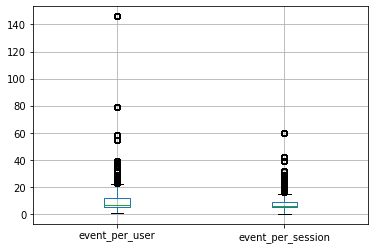

In [50]:
df.loc[(df['dhealth_suc_u'] == 1)].boxplot(column=['event_per_user','event_per_session'], return_type='axes')

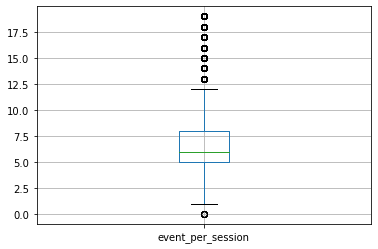

In [51]:
ev.loc[(ev['dhealth_suc_u'] == 1)].boxplot(column='event_per_session', return_type='axes')

In [169]:
ev['event_count'] = ev.groupby('cat_label')['cat_label'].transform('count')

In [60]:
# ev['event_suc_count'] = np.where(ev['dhealth_suc_u'] == 1,
#                                  ev.loc[(ev['dhealth_suc_u'] == 1)].groupby('cat_label')['cat_label'].transform('count'),
#                                  0)

In [113]:
ev.groupby('cat_label')['cat_label'].count().to_csv('event_all.csv')

In [114]:
ev.loc[(ev['dhealth_suc_u'] == 1)].groupby('cat_label')['cat_label'].count().to_csv('event_suc.csv')

In [170]:
df_page['source_new'] = np.where(df_page['source'].str.contains('google'), 'google', 
                                 np.where(df_page['source'].str.contains('facebook'), 'facebook', 
                                 np.where(df_page['source'].str.contains('direct'), 'direct', 
                                 np.where(df_page['source'].str.contains('dailynew'), 'dailynews',          
                                 np.where(df_page['source'].str.contains('fbpost'), 'facebook',          
                                 np.where(df_page['source'].str.contains('sms'), 'sms',          
                                 np.where(df_page['source'].str.contains('line'), 'line',          
                                 np.where(df_page['source'].str.contains('fbad'), 'fb ads','other'))))))))

In [171]:
df_page['medium_new'] = np.where(df_page['medium'].str.contains('organic'), 'organic',
                                   np.where(df_page['medium'].str.contains('none'), 'none',
                                   np.where(df_page['medium'].str.contains('referral'), 'referral',
                                   np.where(df_page['medium'].str.contains('menuloan'), 'menuloan',         
                                   np.where(df_page['medium'].str.contains('sem'), 'sem',    
                                   np.where(df_page['medium'].str.contains('direct'), 'direct', 'other'))))))

In [156]:
temp22 = temp.loc[(temp['prodgroup2'] == 'whole-life-insurance')].drop_duplicates(subset = ['fullVisitorId'])
temp23 = temp.loc[(temp['prodgroup2'] == 'life-insurance')].drop_duplicates(subset = ['fullVisitorId'])

In [157]:
temp['whole'] = temp.fullVisitorId.isin(temp22.fullVisitorId).astype(int)
temp['life'] = temp.fullVisitorId.isin(temp23.fullVisitorId).astype(int)

In [172]:
df_page['landing'] = np.where((df_page['hitNumber'] == '1'), df_page['pathlastlv2'],'')

In [173]:
df['health_suc_u'] = df.fullVisitorId.isin(health_suc.fullVisitorId).astype(int)

In [174]:
compare = df.loc[(df['health_suc_u'] != 10) & (df['cat_label'].str.contains('compare'))].drop_duplicates(['fullVisitorId'])

In [175]:
compare_suc = df.loc[(df['health_suc_u'] == 1) & (df['cat_label'].str.contains('compare'))].drop_duplicates(['fullVisitorId'])

In [176]:
compare_fail = df.loc[(df['health_suc_u'] != 1) & (df['cat_label'].str.contains('compare'))]

In [177]:
temp3['compare_suc'] = temp3.fullVisitorId.isin(compare.fullVisitorId).astype(int)

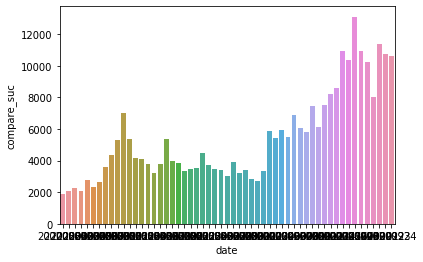

In [198]:
tmp = temp3.drop_duplicates('fullVisitorId').groupby('date').compare_suc.count().reset_index(inplace=False)
sns.barplot(x=tmp.date, y=tmp.compare_suc, data=tmp)

In [178]:
df_page['compare_suc'] = df_page.fullVisitorId.isin(compare.fullVisitorId).astype(int)

In [179]:
banner_dhealth = df.loc[(df['cat_label'].str.contains('banner_button & https://www.muangthai.co.th/th/health-insurance/d-health')) | (df['cat_label'].str.contains('banner_button & https://www.muangthai.co.th/th/health-insurance/d-health'))].drop_duplicates(['fullVisitorId'])

In [180]:
df_page['banner_dhealth'] = df_page.fullVisitorId.isin(banner_dhealth.fullVisitorId).astype(int)